In [ ]:
# Importação das bibliotecas necessárias:

import matplotlib.pyplot as plt              # Biblioteca de exibição gráfica
import numpy as np                           # Biblioteca de algebra linear

from matplotlib import cm

# Exibição correta dos gráficos no Jupyter
%matplotlib inline

In [ ]:
# Definindo a quantidade de amostras necessárias:
M = 1000

# Definindo os valores de entrada:
x1 = np.random.randn(M, 1)
x2 = np.random.randn(M, 1)

# Definindo os valores do ruído:
w = np.random.randn(M, 1)

# Definindo os valores de sáida:
y = 2 * x1 + 2 * x2 + w

In [ ]:
# Criando a SUPERFÍCIE DE ERRO:

# Defininindo o número de iterações:
N = 400

# Definindo valores LINEARMENTE espaçados para os PESOS:
a0 = np.linspace(-10.0, 10.0, N)
a1 = np.linspace(-10.0, 10.0, N)

# Criando a malha da superfície de ERRO:
A0, A1 = np.meshgrid(a0, a1)

# Criando a matriz para armazenamento dos erros:
J = np.zeros((N,N))

# lOOP:
for iter1 in range(0, N):
    for iter2 in range(0, N):
        
        y_hat = A0[iter1][iter2] * x1 + A1[iter1][iter2] * x2
        J[iter1][iter2] = (1.0/M)*np.sum(np.square(y - y_hat))

In [ ]:
# Plotando o gráfico da SUPERFÍCIE DE ERRO:

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A0, A1, J, cmap=cm.coolwarm, linewidth=0, 
                       antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_0$', fontsize=16)
ax.set_ylabel('$a_1$', fontsize=16)
ax.set_zlabel('$J_e$', fontsize=16);
plt.title('Superficie de Erro')
plt.show()

In [ ]:
# Concatenando os valores de x's:
X = np.c_[x1, x2]

# Aplicando a formula fechada:
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
y_hat = a_opt[0, 0] * x1 + a_opt[1, 0] * x2 
j_opt = (1/M)*np.sum(np.power((y - y_hat), 2) )

In [ ]:
# Imprimindo os PESOS ÓTIMOS encontrados pela FORMULA FECHADA:
print('O valor de a1 ótimo encontrado é: {}'.format(a_opt[0, 0]))
print('O valor de a2 ótimo encontrado é: {}'.format(a_opt[1, 0]))

In [27]:
# Definindo o PASSO DE APRENDIZAGEM: 
alpha = 0.1

# Criando o vetor para ARMAZENAMENTO dos PESOS ÓTIMOS:
a = np.zeros((2, 1))

# Definindo os valores INICIAIS dos pesos:
a[0, 0] = -10
a[1, 0] = -10

# Criando a matriz de pesos HISTÓRICOS:
a_hist = np.zeros((2, M+1))

# Criando a matriz de ERRO:
jgd = np.zeros(M+1)

# Definindo o valor do ERRO INICIAL:
jgd[0] = (1.0/M) * sum(np.power(y - X.dot(a), 2))

In [28]:
# Defindo o inicio da iteração
iteration = 0

# Criando uma matriz de GRADIENTES HISTÓRICOS:
grad_hist = np.zeros((2, M))

In [29]:
# LOOP do GRADIENTE:
while iteration < M:
    
    gradients = -(2.0/M) * X.T.dot(y - y_hat)
    
    grad_hist[0, iteration] = gradients[0, 0]
    grad_hist[1, iteration] = gradients[1, 0]
    
    a = a - alpha * gradients
    
    a_hist[0, iteration + 1] = a[0, 0]
    a_hist[1, iteration + 1] = a[1, 0]
    
    y_hat = a[0, 0] * x1 + a[1, 0] * x2
    
    jgd[iteration + 1] = (1.0/M) * sum(np.power((y - y_hat), 2))
    
    iteration = iteration + 1

In [30]:
# Imprimindo os PESOS ÓTIMOS encontrados pelo GRADIENTE:
print('O valor de a1 ótimo encontrado pelo gradiente é: {}'.format(a[0, 0]))
print('O valor de a2 ótimo encontrado pelo gradiente é: {}'.format(a[1, 0]))

O valor de a1 ótimo encontrado pelo gradiente é: 2.0485125059433327
O valor de a2 ótimo encontrado pelo gradiente é: 2.003530730288861


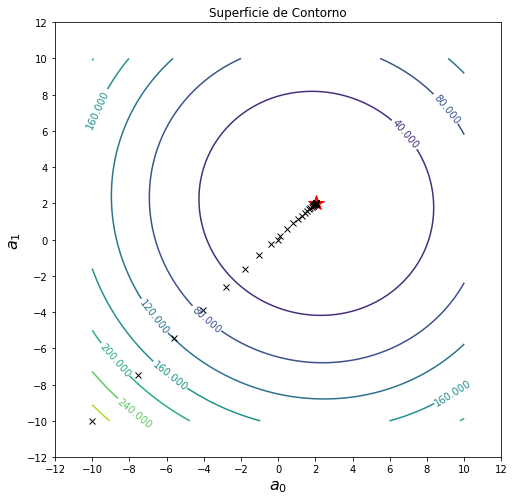

In [31]:
# Plotando a superfície de contorno dos PESOS vs ERRO

fig = plt.figure(figsize=(8, 8))
cp = plt.contour(A0, A1, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_0$', fontsize=16)
plt.ylabel('$a_1$', fontsize=16)
plt.title('Superficie de Contorno')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=16)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xticks(np.arange(-12, 14, step=2.0))
plt.yticks(np.arange(-12, 14, step=2.0))
plt.show()

In [ ]:
# Plotando o GRÁFICO do ERRO vs NÚMERO DE ITERAÇÕES:
fig = plt.figure(figsize=(8,8))
plt.plot(np.arange(0, iteration), jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
#plt.savefig("error_vs_iteration_bgd.png", dpi=600)
plt.show()